## Estimating how Many Cars are Avaliable at home During the Time of Peak Loads

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
travel = pd.read_csv("C:/Users/sarah/Documents/traveltimes.csv")

In [3]:
#turn vehicalId into a string
travel['VEHCASEID'] = travel['VEHCASEID'].astype(str)
len(pd.unique(travel.VEHCASEID))

7086

In [4]:
#Take away trips when Endtime and Starttime are unknown
travel = travel[travel['ENDTIME'] != -9]
travel = travel[travel['STRTTIME'] != -9]


In [5]:
travel.ENDTIME

0        1450
1        1615
2         730
3         750
4         830
         ... 
31069    1335
31070    1500
31071    1234
31072    1242
31073    1302
Name: ENDTIME, Length: 31053, dtype: int64

In [6]:
#travel['ENDTIME'] = travel['ENDTIME'].astype(str).apply(lambda x: '0' + x if len(x) < 4 else x)
#travel['ENDTIME'] = pd.to_datetime(travel['ENDTIME'], format='%H%M')
#travel['hour'] = travel['ENDTIME'].dt.hour


In [7]:
travel.columns

Index(['HOUSEID', 'PERSONID', 'TRIPID', 'SEQ_TRIPID', 'VEHCASEID', 'FRSTHM',
       'PARK', 'HHMEMDRV', 'TDWKND', 'TRAVDAY', 'LOOP_TRIP', 'DWELTIME',
       'PUBTRANS', 'TRIPPURP', 'WHYFROM', 'WHYTRP1S', 'TRVLCMIN', 'STRTTIME',
       'ENDTIME', 'TRPHHVEH', 'VEHID', 'TRPTRANS', 'NUMONTRP', 'ONTD_P1',
       'ONTD_P2', 'ONTD_P3', 'ONTD_P4', 'ONTD_P5', 'ONTD_P6', 'ONTD_P7',
       'ONTD_P8', 'ONTD_P9', 'ONTD_P10', 'NONHHCNT', 'HHACCCNT', 'WHODROVE',
       'DRVR_FLG', 'PSGR_FLG', 'WHODROVE_IMP', 'PARK2_PAMOUNT',
       'PARK2_PAYTYPE', 'PARK2', 'WHYTO', 'WALK', 'TRPMILES', 'WTTRDFIN',
       'WTTRDFIN5D', 'WTTRDFIN2D', 'TDCASEID', 'VMT_MILE', 'GASPRICE',
       'WHYTRP90', 'NUMADLT', 'HOMEOWN', 'RAIL', 'CENSUS_D', 'CENSUS_R',
       'HH_HISP', 'DRVRCNT', 'CDIVMSAR', 'HHFAMINC', 'HH_RACE', 'HHSIZE',
       'HHVEHCNT', 'LIF_CYC', 'MSACAT', 'MSASIZE', 'URBAN', 'URBANSIZE',
       'URBRUR', 'TDAYDATE', 'WRKCOUNT', 'STRATUMID', 'R_AGE', 'R_SEX',
       'WORKER', 'DRIVER', 'R_RACE', 'R_HISP', 

In [8]:
#find conditions where the return time is after midnight
condition_met_rows = travel[travel['STRTTIME'] > travel["ENDTIME"]]

# Print the rows where the condition is met
print(condition_met_rows)

          HOUSEID  PERSONID  TRIPID  SEQ_TRIPID       VEHCASEID  FRSTHM  PARK  \
214    9000013565         1       7           7            -1.0       1     2   
504    9000014395         1       4           4  900001439503.0       1     2   
793    9000015170         1       5           5  900001517001.0       1     2   
831    9000015203         1       5           5  900001520302.0       1     2   
834    9000015203         2       3           3  900001520302.0       1     2   
...           ...       ...     ...         ...             ...     ...   ...   
26692  9000174318         1       3           3  900017431801.0       1     2   
26824  9000174623         1       5           5            -1.0       1     2   
26827  9000174623         2       3           3            -1.0       1    -1   
27411  9000208661         3       2           2            -1.0       1    -1   
27467  9000208811         1       1           1            -1.0       1     2   

       HHMEMDRV  TDWKND  TR

In [9]:
#take away trips that did not have a vehcile 
travel = travel[travel["VEHCASEID"] != "-1.0"]

In [10]:
travel['TRIP_NUMBER'] = travel.groupby('VEHCASEID').cumcount() + 1

# Pivot the data to create a new DataFrame with one row per vehicle and multiple columns for trip start and end times
trips_per_car_pivot = travel.pivot_table(index='VEHCASEID', columns='TRIP_NUMBER', values=['STRTTIME', 'ENDTIME'])

trips_per_car_pivot.columns = [f'{col[0]}_{col[1]}' for col in trips_per_car_pivot.columns]

trips_per_car_pivot.reset_index(inplace=True)

In [11]:
trips_per_car_pivot


,VEHCASEID,ENDTIME_1,ENDTIME_2,ENDTIME_3,ENDTIME_4,ENDTIME_5,ENDTIME_6,ENDTIME_7,ENDTIME_8,ENDTIME_9,...,STRTTIME_34,STRTTIME_35,STRTTIME_36,STRTTIME_37,STRTTIME_38,STRTTIME_39,STRTTIME_40,STRTTIME_41,STRTTIME_42,STRTTIME_43
0,900001300201.0,1450.0,1615.0,1450.0,1615.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,900001300202.0,730.0,750.0,830.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,900001301601.0,940.0,1415.0,1630.0,940.0,1415.0,1630.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,900001303901.0,1710.0,1810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,900001304201.0,1530.0,1700.0,1530.0,1700.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080,900021799201.0,745.0,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7081,900021799202.0,830.0,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7082,900021800601.0,1808.0,1815.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7083,900021801301.0,1315.0,1335.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for i in range(1, 44):
    # Convert to string and handle leading zeros
    trips_per_car_pivot[f'STRTTIME_{i}'] = trips_per_car_pivot[f'STRTTIME_{i}'].astype(str).apply(lambda x: '0' + x if len(x) < 4 else x)
    trips_per_car_pivot[f'ENDTIME_{i}'] = trips_per_car_pivot[f'ENDTIME_{i}'].astype(str).apply(lambda x: '0' + x if len(x) < 4 else x)
    
    # Parse datetime with format 'HHMM.S' and ignore NaNs
    trips_per_car_pivot[f'STRTTIME_{i}'] = pd.to_datetime(trips_per_car_pivot[f'STRTTIME_{i}'], format='%H%M.%S', errors='coerce')
    trips_per_car_pivot[f'ENDTIME_{i}'] = pd.to_datetime(trips_per_car_pivot[f'ENDTIME_{i}'], format='%H%M.%S', errors='coerce')

In [13]:
#count the number of cars not being driven for each hour.
hour_counts = {}

# Iterate through each row in the DataFrame
for index, row in trips_per_car_pivot.iterrows():
    # Iterate through each hour of the day
    for hour in range(24):
        # Check if the hour is not between any start and end times
        hour_in_use = any((pd.notnull(row[f'STRTTIME_{i}']) and pd.notnull(row[f'ENDTIME_{i}']) and 
                           row[f'STRTTIME_{i}'].hour <= hour <= row[f'ENDTIME_{i}'].hour) for i in range(1, 44))
        # Increment the hour count in the dictionary
        hour_counts[hour] = hour_counts.get(hour, 0) + int(not hour_in_use)

In [14]:
trips_per_car_pivot.ENDTIME_41.max()

Timestamp('1900-01-01 18:30:00')

In [15]:
print(trips_per_car_pivot.columns)

Index(['VEHCASEID', 'ENDTIME_1', 'ENDTIME_2', 'ENDTIME_3', 'ENDTIME_4',
       'ENDTIME_5', 'ENDTIME_6', 'ENDTIME_7', 'ENDTIME_8', 'ENDTIME_9',
       'ENDTIME_10', 'ENDTIME_11', 'ENDTIME_12', 'ENDTIME_13', 'ENDTIME_14',
       'ENDTIME_15', 'ENDTIME_16', 'ENDTIME_17', 'ENDTIME_18', 'ENDTIME_19',
       'ENDTIME_20', 'ENDTIME_21', 'ENDTIME_22', 'ENDTIME_23', 'ENDTIME_24',
       'ENDTIME_25', 'ENDTIME_26', 'ENDTIME_27', 'ENDTIME_28', 'ENDTIME_29',
       'ENDTIME_30', 'ENDTIME_31', 'ENDTIME_32', 'ENDTIME_33', 'ENDTIME_34',
       'ENDTIME_35', 'ENDTIME_36', 'ENDTIME_37', 'ENDTIME_38', 'ENDTIME_39',
       'ENDTIME_40', 'ENDTIME_41', 'ENDTIME_42', 'ENDTIME_43', 'STRTTIME_1',
       'STRTTIME_2', 'STRTTIME_3', 'STRTTIME_4', 'STRTTIME_5', 'STRTTIME_6',
       'STRTTIME_7', 'STRTTIME_8', 'STRTTIME_9', 'STRTTIME_10', 'STRTTIME_11',
       'STRTTIME_12', 'STRTTIME_13', 'STRTTIME_14', 'STRTTIME_15',
       'STRTTIME_16', 'STRTTIME_17', 'STRTTIME_18', 'STRTTIME_19',
       'STRTTIME_20', 'STRT

In [16]:
print(travel.columns)

Index(['HOUSEID', 'PERSONID', 'TRIPID', 'SEQ_TRIPID', 'VEHCASEID', 'FRSTHM',
       'PARK', 'HHMEMDRV', 'TDWKND', 'TRAVDAY', 'LOOP_TRIP', 'DWELTIME',
       'PUBTRANS', 'TRIPPURP', 'WHYFROM', 'WHYTRP1S', 'TRVLCMIN', 'STRTTIME',
       'ENDTIME', 'TRPHHVEH', 'VEHID', 'TRPTRANS', 'NUMONTRP', 'ONTD_P1',
       'ONTD_P2', 'ONTD_P3', 'ONTD_P4', 'ONTD_P5', 'ONTD_P6', 'ONTD_P7',
       'ONTD_P8', 'ONTD_P9', 'ONTD_P10', 'NONHHCNT', 'HHACCCNT', 'WHODROVE',
       'DRVR_FLG', 'PSGR_FLG', 'WHODROVE_IMP', 'PARK2_PAMOUNT',
       'PARK2_PAYTYPE', 'PARK2', 'WHYTO', 'WALK', 'TRPMILES', 'WTTRDFIN',
       'WTTRDFIN5D', 'WTTRDFIN2D', 'TDCASEID', 'VMT_MILE', 'GASPRICE',
       'WHYTRP90', 'NUMADLT', 'HOMEOWN', 'RAIL', 'CENSUS_D', 'CENSUS_R',
       'HH_HISP', 'DRVRCNT', 'CDIVMSAR', 'HHFAMINC', 'HH_RACE', 'HHSIZE',
       'HHVEHCNT', 'LIF_CYC', 'MSACAT', 'MSASIZE', 'URBAN', 'URBANSIZE',
       'URBRUR', 'TDAYDATE', 'WRKCOUNT', 'STRATUMID', 'R_AGE', 'R_SEX',
       'WORKER', 'DRIVER', 'R_RACE', 'R_HISP', 

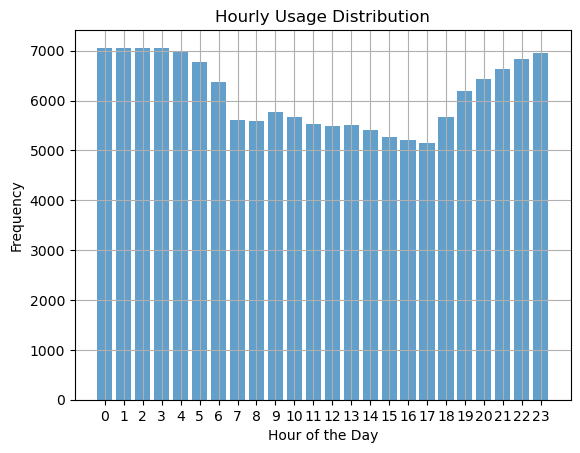

In [17]:
#total number of cars in the survey per hour
hour_counts = {hour: count for hour, count in hour_counts.items() if 0 <= hour < 24}

# Extract hour and count values from the dictionary
hours = list(hour_counts.keys())
counts = list(hour_counts.values())

# Plot histogram
plt.bar(hours, counts, align='center', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Hourly Usage Distribution')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [18]:
#separate by weekday/weekend
condition_weekend = (travel["TRAVDAY"] == 1) | (travel["TRAVDAY"] == 7)
condition_week = (travel["TRAVDAY"] == 2) | (travel["TRAVDAY"] == 3) | (travel["TRAVDAY"] == 4) | (travel["TRAVDAY"] == 5) | (travel["TRAVDAY"] == 6)

week_travel = travel[condition_week]
weekend_travel = travel[condition_weekend]


In [19]:
week_travel

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,...,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,TRIP_NUMBER
7,9000013016,1,1,1,900001301601.0,1,2,1,2,4,...,1,1,2,1,6,-1,2,1,7,1
8,9000013016,1,2,2,900001301601.0,1,2,1,2,4,...,1,1,2,1,6,-1,2,1,7,2
9,9000013016,1,3,3,900001301601.0,1,2,1,2,4,...,1,1,2,1,6,-1,2,1,7,3
10,9000013016,2,1,1,900001301601.0,1,-1,1,2,4,...,1,1,2,2,4,-1,1,1,7,4
11,9000013016,2,2,2,900001301601.0,1,-1,1,2,4,...,1,1,2,2,4,-1,1,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31068,9000218013,1,1,1,900021801301.0,1,2,1,2,5,...,1,1,2,1,7,5,2,3,3,1
31069,9000218013,1,2,2,900021801301.0,1,2,1,2,5,...,1,1,2,1,7,5,2,3,3,2
31070,9000218013,1,3,3,900021801301.0,1,2,1,2,5,...,1,1,2,1,7,5,2,3,3,3
31071,9000218040,1,1,1,900021804001.0,1,2,1,2,5,...,1,1,2,1,4,-1,2,4,6,1


In [20]:
weekend_travel

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,...,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,TRIP_NUMBER
0,9000013002,1,1,1,900001300201.0,1,2,1,1,1,...,1,1,2,1,7,3,2,3,11,1
1,9000013002,1,2,2,900001300201.0,1,2,1,1,1,...,1,1,2,1,7,3,2,3,11,2
2,9000013002,2,1,1,900001300202.0,1,-1,1,1,1,...,1,1,2,2,7,-1,1,3,11,1
3,9000013002,2,2,2,900001300202.0,1,-1,1,1,1,...,1,1,2,2,7,-1,1,3,11,2
4,9000013002,2,3,3,900001300202.0,1,-1,1,1,1,...,1,1,2,2,7,-1,1,3,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31010,9000217854,2,1,1,900021785402.0,2,2,1,1,7,...,1,1,2,1,4,-1,2,1,9,1
31011,9000217854,2,2,2,900021785402.0,2,2,1,1,7,...,1,1,2,1,4,-1,2,1,9,2
31012,9000217854,2,3,3,900021785402.0,2,2,1,1,7,...,1,1,2,1,4,-1,2,1,9,3
31013,9000217854,3,1,1,900021785403.0,1,-1,1,1,7,...,1,1,1,2,6,-1,1,1,9,1


In [21]:
week_travel['TRIP_NUMBER'] = week_travel.groupby('VEHCASEID').cumcount() + 1

# Pivot the data to create a new DataFrame with one row per person and multiple columns for trip start and end times
trips_per_car_week = week_travel.pivot_table(index='VEHCASEID', columns='TRIP_NUMBER', values=['STRTTIME', 'ENDTIME'])
trips_per_car_week.columns = [f'{col[0]}_{col[1]}' for col in trips_per_car_week.columns]
trips_per_car_week.reset_index(inplace=True)

C:\Users\sarah\AppData\Local\Temp\ipykernel_24228\1265800728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_travel['TRIP_NUMBER'] = week_travel.groupby('VEHCASEID').cumcount() + 1


In [22]:
trips_per_car_week

,VEHCASEID,ENDTIME_1,ENDTIME_2,ENDTIME_3,ENDTIME_4,ENDTIME_5,ENDTIME_6,ENDTIME_7,ENDTIME_8,ENDTIME_9,...,STRTTIME_34,STRTTIME_35,STRTTIME_36,STRTTIME_37,STRTTIME_38,STRTTIME_39,STRTTIME_40,STRTTIME_41,STRTTIME_42,STRTTIME_43
0,900001301601.0,940.0,1415.0,1630.0,940.0,1415.0,1630.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,900001303901.0,1710.0,1810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,900001304201.0,1530.0,1700.0,1530.0,1700.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,900001304501.0,1350.0,1410.0,1620.0,1635.0,1720.0,1350.0,1635.0,1720.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,900001308101.0,1045.0,1215.0,1335.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,900021799201.0,745.0,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5372,900021799202.0,830.0,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5373,900021800601.0,1808.0,1815.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5374,900021801301.0,1315.0,1335.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
weekend_travel['TRIP_NUMBER'] = weekend_travel.groupby('VEHCASEID').cumcount() + 1

# Pivot the data to create a new DataFrame with one row per person and multiple columns for trip start and end times
trips_per_car_weekend = weekend_travel.pivot_table(index='VEHCASEID', columns='TRIP_NUMBER', values=['STRTTIME', 'ENDTIME'])

trips_per_car_weekend.columns = [f'{col[0]}_{col[1]}' for col in trips_per_car_weekend.columns]

trips_per_car_weekend.reset_index(inplace=True)

C:\Users\sarah\AppData\Local\Temp\ipykernel_24228\1789188225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_travel['TRIP_NUMBER'] = weekend_travel.groupby('VEHCASEID').cumcount() + 1


In [24]:
trips_per_car_weekend

,VEHCASEID,ENDTIME_1,ENDTIME_2,ENDTIME_3,ENDTIME_4,ENDTIME_5,ENDTIME_6,ENDTIME_7,ENDTIME_8,ENDTIME_9,...,STRTTIME_18,STRTTIME_19,STRTTIME_20,STRTTIME_21,STRTTIME_22,STRTTIME_23,STRTTIME_24,STRTTIME_25,STRTTIME_26,STRTTIME_27
0,900001300201.0,1450.0,1615.0,1450.0,1615.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,900001300202.0,730.0,750.0,830.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,900001306801.0,1330.0,2030.0,1330.0,2030.0,1330.0,2030.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,900001314501.0,1340.0,1355.0,1610.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,900001323702.0,1410.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,900021759801.0,955.0,1100.0,2050.0,2205.0,955.0,1100.0,2050.0,2205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1705,900021762502.0,830.0,1145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1706,900021782503.0,1550.0,1920.0,1550.0,1920.0,1550.0,1920.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1707,900021785402.0,600.0,1530.0,1745.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for i in range(1, 44):
    # Convert to string and handle leading zeros
    trips_per_car_week[f'STRTTIME_{i}'] = trips_per_car_week[f'STRTTIME_{i}'].astype(str).apply(lambda x: '0' + x if len(x) < 4 else x)
    trips_per_car_week[f'ENDTIME_{i}'] = trips_per_car_week[f'ENDTIME_{i}'].astype(str).apply(lambda x: '0' + x if len(x) < 4 else x)
    
    # Parse datetime with format 'HHMM.S' and ignore NaNs
    trips_per_car_week[f'STRTTIME_{i}'] = pd.to_datetime(trips_per_car_week[f'STRTTIME_{i}'], format='%H%M.%S', errors='coerce')
    trips_per_car_week[f'ENDTIME_{i}'] = pd.to_datetime(trips_per_car_week[f'ENDTIME_{i}'], format='%H%M.%S', errors='coerce')

In [26]:
hour_countsweek = {}

# Iterate through each row in the DataFrame
for index, row in trips_per_car_week.iterrows():
    # Iterate through each hour of the day
    for hour in range(24):
        # Check if the hour is not between any start and end times
        hour_in_useweek = any((pd.notnull(row[f'STRTTIME_{i}']) and pd.notnull(row[f'ENDTIME_{i}']) and 
                           row[f'STRTTIME_{i}'].hour <= hour <= row[f'ENDTIME_{i}'].hour) for i in range(1, 44))
        # add the hour count in the dictionary
        hour_countsweek[hour] = hour_countsweek.get(hour, 0) + int(not hour_in_useweek)

In [27]:
for i in range(1, 27):
    # Convert to string and handle leading zeros
    trips_per_car_weekend[f'STRTTIME_{i}'] = trips_per_car_weekend[f'STRTTIME_{i}'].astype(str).apply(lambda x: '0' + x if len(x) < 4 else x)
    trips_per_car_weekend[f'ENDTIME_{i}'] = trips_per_car_weekend[f'ENDTIME_{i}'].astype(str).apply(lambda x: '0' + x if len(x) < 4 else x)
    
    # Parse datetime with format 'HHMM.S' and ignore NaNs
    trips_per_car_weekend[f'STRTTIME_{i}'] = pd.to_datetime(trips_per_car_weekend[f'STRTTIME_{i}'], format='%H%M.%S', errors='coerce')
    trips_per_car_weekend[f'ENDTIME_{i}'] = pd.to_datetime(trips_per_car_weekend[f'ENDTIME_{i}'], format='%H%M.%S', errors='coerce')

In [28]:
hour_countsweekend = {}

# Iterate through each row in the DataFrame
for index, row in trips_per_car_weekend.iterrows():
    # Iterate through each hour of the day
    for hour in range(24):
        # Check if the hour is not between any start and end times
        hour_in_useweekend = any((pd.notnull(row[f'STRTTIME_{i}']) and pd.notnull(row[f'ENDTIME_{i}']) and 
                           row[f'STRTTIME_{i}'].hour <= hour <= row[f'ENDTIME_{i}'].hour) for i in range(1, 27))
        hour_countsweekend[hour] = hour_countsweekend.get(hour, 0) + int(not hour_in_useweekend)

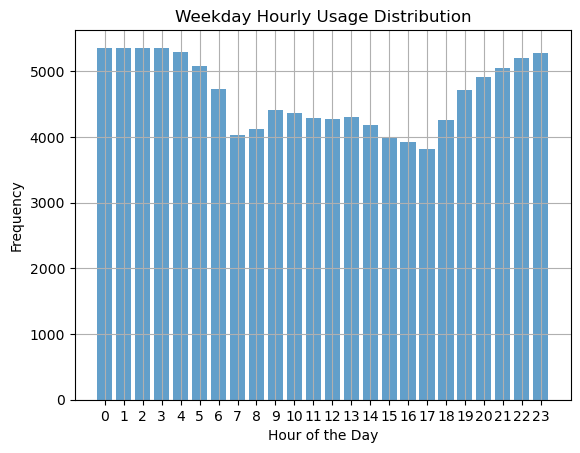

In [29]:
#histogram of number of cars in survey weekday
hour_countsweek = {hour: count for hour, count in hour_countsweek.items() if 0 <= hour < 24}

# Extract hour and count values from the dictionary
hoursweek = list(hour_countsweek.keys())
countsweek = list(hour_countsweek.values())

# Plot histogram
plt.bar(hoursweek, countsweek, align='center', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Weekday Hourly Usage Distribution')
plt.xticks(range(24))
plt.grid(True)
plt.show()

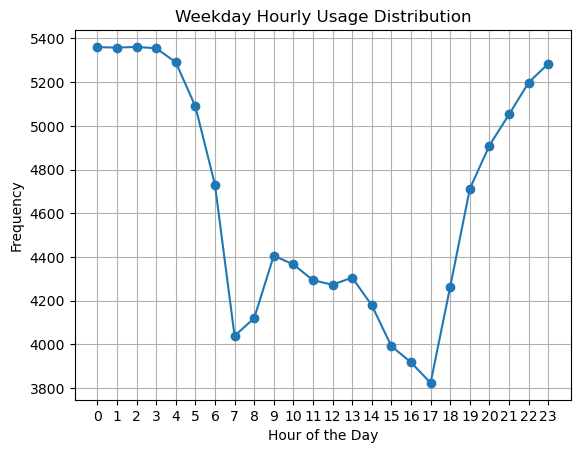

In [30]:
#plot of the number of cars in survey
plt.plot(hoursweek, countsweek, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Weekday Hourly Usage Distribution')
plt.xticks(range(24))
plt.grid(True)
plt.show()

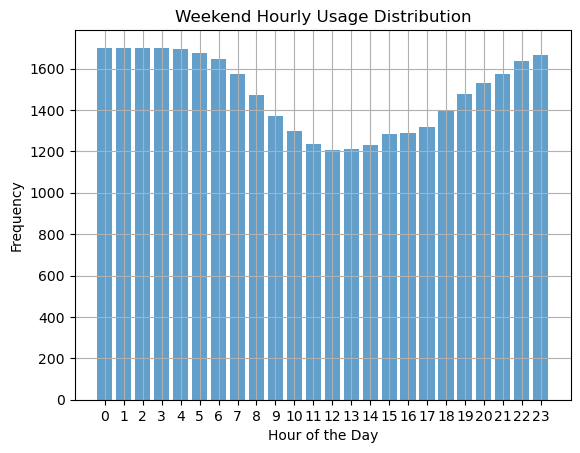

In [31]:
hour_countsweekend = {hour: count for hour, count in hour_countsweekend.items() if 0 <= hour < 24}

# Extract hour and count values from the dictionary
hoursweekend = list(hour_countsweekend.keys())
countsweekend = list(hour_countsweekend.values())

# Plot histogram
plt.bar(hoursweekend, countsweekend, align='center', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Weekend Hourly Usage Distribution')
plt.xticks(range(24))
plt.grid(True)
plt.show()

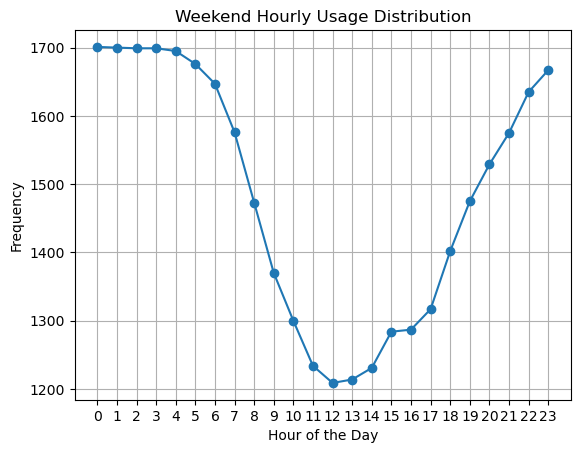

In [32]:
plt.plot(hoursweekend, countsweekend, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Weekend Hourly Usage Distribution')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [33]:
#number of cars avaliable in the survey for each hour
hour_countsweekend

{0: 1701,
 1: 1700,
 2: 1699,
 3: 1699,
 4: 1695,
 5: 1676,
 6: 1647,
 7: 1576,
 8: 1473,
 9: 1370,
 10: 1300,
 11: 1234,
 12: 1209,
 13: 1214,
 14: 1231,
 15: 1284,
 16: 1287,
 17: 1317,
 18: 1402,
 19: 1475,
 20: 1529,
 21: 1575,
 22: 1635,
 23: 1667}

In [34]:
hour_counts

{0: 7061,
 1: 7058,
 2: 7060,
 3: 7054,
 4: 6986,
 5: 6765,
 6: 6378,
 7: 5615,
 8: 5593,
 9: 5776,
 10: 5666,
 11: 5528,
 12: 5482,
 13: 5520,
 14: 5410,
 15: 5276,
 16: 5205,
 17: 5141,
 18: 5666,
 19: 6187,
 20: 6439,
 21: 6627,
 22: 6833,
 23: 6951}

In [35]:

hour_countsweek

{0: 5360,
 1: 5358,
 2: 5361,
 3: 5355,
 4: 5291,
 5: 5089,
 6: 4731,
 7: 4039,
 8: 4120,
 9: 4406,
 10: 4366,
 11: 4294,
 12: 4273,
 13: 4306,
 14: 4179,
 15: 3992,
 16: 3918,
 17: 3824,
 18: 4264,
 19: 4712,
 20: 4910,
 21: 5052,
 22: 5198,
 23: 5284}

In [36]:
trips_per_car_week

,VEHCASEID,ENDTIME_1,ENDTIME_2,ENDTIME_3,ENDTIME_4,ENDTIME_5,ENDTIME_6,ENDTIME_7,ENDTIME_8,ENDTIME_9,...,STRTTIME_34,STRTTIME_35,STRTTIME_36,STRTTIME_37,STRTTIME_38,STRTTIME_39,STRTTIME_40,STRTTIME_41,STRTTIME_42,STRTTIME_43
0,900001301601.0,1900-01-01 09:40:00,1900-01-01 14:15:00,1900-01-01 16:30:00,1900-01-01 09:40:00,1900-01-01 14:15:00,1900-01-01 16:30:00,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,900001303901.0,1900-01-01 17:10:00,1900-01-01 18:10:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,900001304201.0,1900-01-01 15:30:00,1900-01-01 17:00:00,1900-01-01 15:30:00,1900-01-01 17:00:00,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,900001304501.0,1900-01-01 13:50:00,1900-01-01 14:10:00,1900-01-01 16:20:00,1900-01-01 16:35:00,1900-01-01 17:20:00,1900-01-01 13:50:00,1900-01-01 16:35:00,1900-01-01 17:20:00,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,900001308101.0,1900-01-01 10:45:00,1900-01-01 12:15:00,1900-01-01 13:35:00,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,900021799201.0,1900-01-01 07:45:00,1900-01-01 17:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5372,900021799202.0,1900-01-01 08:30:00,1900-01-01 18:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5373,900021800601.0,1900-01-01 18:08:00,1900-01-01 18:15:00,1900-01-01 18:40:00,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5374,900021801301.0,1900-01-01 13:15:00,1900-01-01 13:35:00,1900-01-01 15:00:00,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [37]:
countsweek = list(hour_countsweek.values())
countsweek

[5360,
 5358,
 5361,
 5355,
 5291,
 5089,
 4731,
 4039,
 4120,
 4406,
 4366,
 4294,
 4273,
 4306,
 4179,
 3992,
 3918,
 3824,
 4264,
 4712,
 4910,
 5052,
 5198,
 5284]

In [38]:
countsweekend = list(hour_countsweekend.values())
countsweekend

[1701,
 1700,
 1699,
 1699,
 1695,
 1676,
 1647,
 1576,
 1473,
 1370,
 1300,
 1234,
 1209,
 1214,
 1231,
 1284,
 1287,
 1317,
 1402,
 1475,
 1529,
 1575,
 1635,
 1667]

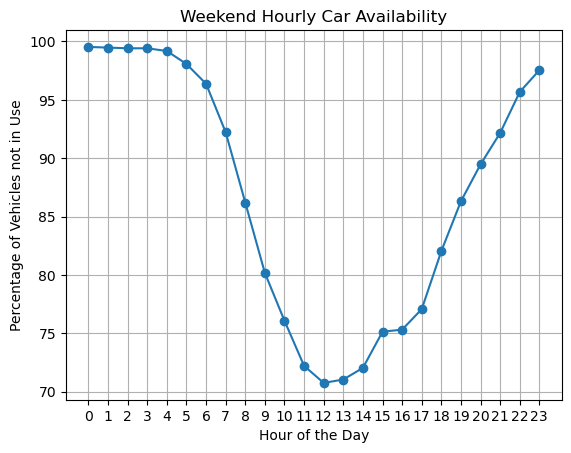

In [39]:
hour_countsweekend = {hour: count for hour, count in hour_countsweekend.items() if 0 <= hour < 24}

hoursweekend = list(hour_countsweekend.keys())
countsweekend = list(hour_countsweekend.values())

# Calculate total count
total_count = len(trips_per_car_weekend)

# Convert counts to percentages
percentagesweekend= [(count / total_count) * 100 for count in countsweekend]

# Plot line chart with percentages
plt.plot(hoursweekend, percentagesweekend, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Vehicles not in Use')
plt.title('Weekend Hourly Car Availability')
plt.xticks(range(24))
plt.grid(True)
plt.show()

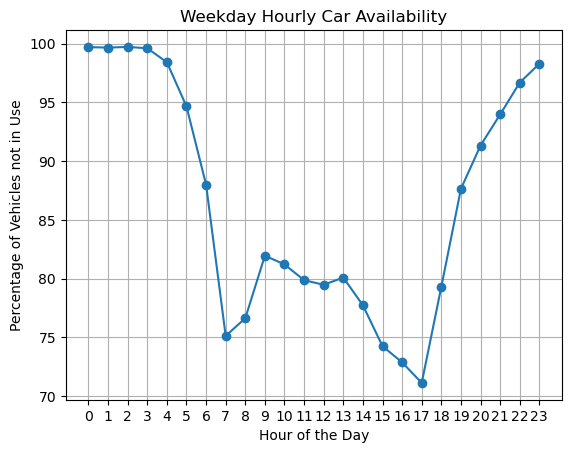

In [40]:
total_countweek = len(trips_per_car_week)

# Convert counts to percentages
percentagesweek = [(count / total_countweek) * 100 for count in countsweek]

# Plot line chart with percentages
plt.plot(hoursweek, percentagesweek, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Vehicles not in Use')
plt.title('Weekday Hourly Car Availability')
plt.xticks(range(24))
plt.grid(True)
plt.show()

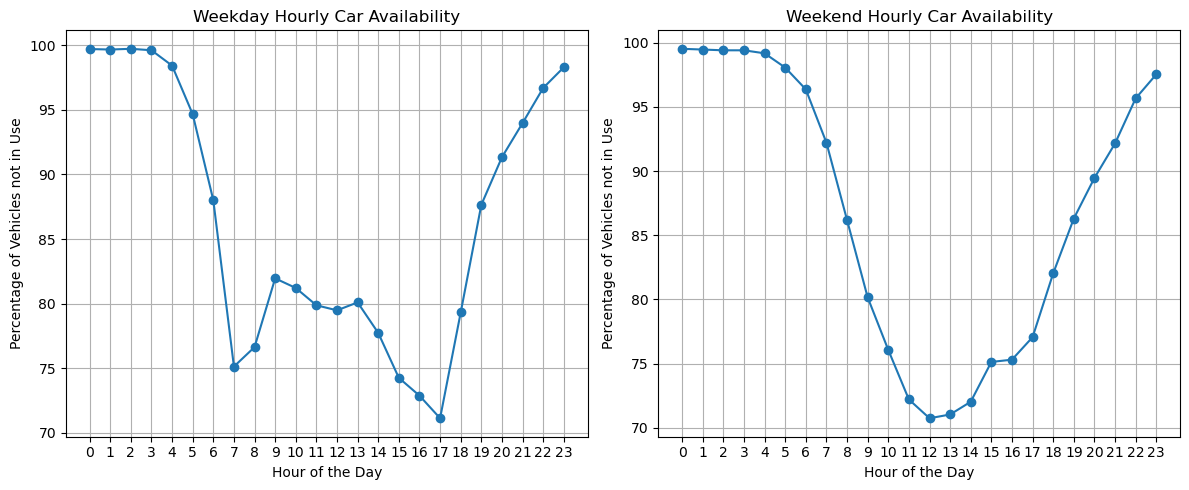

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# first chart (Weekday Hourly Car Availability)
ax1.plot(hoursweek, percentagesweek, marker='o', linestyle='-')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Percentage of Vehicles not in Use')
ax1.set_title('Weekday Hourly Car Availability')
ax1.set_xticks(range(24))
ax1.grid(True)

# second chart (Weekend Hourly Car Availability)
ax2.plot(hoursweekend, percentagesweekend, marker='o', linestyle='-')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Percentage of Vehicles not in Use')
ax2.set_title('Weekend Hourly Car Availability')
ax2.set_xticks(range(24))
ax2.grid(True)

# Adjust layout to display plots together
plt.tight_layout()

plt.show()



In [42]:
#multiply car percentages by total # of EVs avaliable in 2023 weekdays
SDweek = []
for item in percentagesweek:
    number = ((item/100) * 67444) 
    SDweek.append(number)

In [44]:
#add to a dataframe that shows week count for each hour 
sd_ev_week = pd.DataFrame({'hour': hoursweek, 'numevs': SDweek})

In [45]:
#multiply car percentages by total # of EVs avaliable in 2023 weekends
SDweekend = []
for item in percentagesweekend:
    number = ((item/100) * 67444) 
    SDweekend.append(number)

In [46]:
#add to a dataframe that shows week count for each hour 
sd_ev_weekend = pd.DataFrame({'hour': hoursweekend, 'numevs': SDweekend})

In [47]:
sd_ev_week.set_index("hour", inplace = True)

In [48]:
sd_ev_week

,numevs
hour,
0,67243.273810
1,67218.183036
2,67255.819196
3,67180.546875
4,66377.642113
5,63843.473958
6,59352.225446
7,50670.817708
8,51686.994048


In [49]:
sd_ev_weekend.set_index("hour", inplace = True)

In [50]:
sd_ev_weekend

,numevs
hour,
0,67128.287888
1,67088.823874
2,67049.359860
3,67049.359860
4,66891.503803
5,66141.687537
6,64997.231129
7,62195.286132
8,58130.492686


In [51]:
#multiply percentages of avaliable vehicles to estimated # of EVS on the road
week_2030 = []
for item in percentagesweek:
    number = ((item/100) * 337050) 
    week_2030.append(number)
    
weekend_2030 = []
for item in percentagesweekend:
    number = ((item/100) * 337050) 
    weekend_2030.append(number)
    
sd_ev_week2030 = pd.DataFrame({'hour': hoursweek, 'numevs': week_2030})
sd_ev_weekend2030 = pd.DataFrame({'hour': hoursweekend, 'numevs': weekend_2030})

sd_ev_weekend2030.set_index("hour", inplace = True)
sd_ev_week2030.set_index("hour", inplace = True)

In [52]:
sd_ev_weekend2030

,numevs
hour,
0,335472.235225
1,335275.014628
2,335077.794032
3,335077.794032
4,334288.911644
5,330541.720304
6,324822.322996
7,310819.660620
8,290505.939146


In [53]:
sd_ev_week2030

,numevs
hour,
0,336046.875000
1,335921.484375
2,336109.570312
3,335733.398438
4,331720.898438
5,319056.445313
6,296611.523438
7,253226.367188
8,258304.687500


In [59]:
#combine counts
EVavail = pd.concat([sd_ev_week, sd_ev_weekend, sd_ev_week2030, sd_ev_weekend2030], axis=1)


In [55]:
EVavail

,numevs,numevs,numevs,numevs
hour,,,,
0,67243.273810,67128.287888,336046.875000,335472.235225
1,67218.183036,67088.823874,335921.484375,335275.014628
2,67255.819196,67049.359860,336109.570312,335077.794032
3,67180.546875,67049.359860,335733.398438,335077.794032
4,66377.642113,66891.503803,331720.898438,334288.911644
5,63843.473958,66141.687537,319056.445313,330541.720304
6,59352.225446,64997.231129,296611.523438,324822.322996
7,50670.817708,62195.286132,253226.367188,310819.660620
8,51686.994048,58130.492686,258304.687500,290505.939146


In [56]:
#create data frame with colimn names
df_names = ["sd_ev_week", "sd_ev_weekend", "sd_ev_week2030", "sd_ev_weekend2030"]
EVavail.columns = df_names
EVavail

,sd_ev_week,sd_ev_weekend,sd_ev_week2030,sd_ev_weekend2030
hour,,,,
0,67243.273810,67128.287888,336046.875000,335472.235225
1,67218.183036,67088.823874,335921.484375,335275.014628
2,67255.819196,67049.359860,336109.570312,335077.794032
3,67180.546875,67049.359860,335733.398438,335077.794032
4,66377.642113,66891.503803,331720.898438,334288.911644
5,63843.473958,66141.687537,319056.445313,330541.720304
6,59352.225446,64997.231129,296611.523438,324822.322996
7,50670.817708,62195.286132,253226.367188,310819.660620
8,51686.994048,58130.492686,258304.687500,290505.939146


In [58]:
#Save to csv
#EVavail.to_csv('evavail.csv')